# 確率分布関数
有限の個数のデータでは，未知の部分の故障確率を判断できない。有限のデータから連続値に対する確率分布を予想するための，各種関数（正規分布，対数正規分布，ワイブル分布）が定義されている。

まずは，連続変数として，0.01から1000までの範囲で，0.01刻みの数列をnumpy.arangeメソッドで作成する。

In [15]:
import numpy as np
dx = 0.01
x = np.arange(dx,1000,dx)
print(x)

[1.0000e-02 2.0000e-02 3.0000e-02 ... 9.9997e+02 9.9998e+02 9.9999e+02]


加えて，先ほどのグラフ作成一連の動作を，メソッド(def)として定義しておく  
== は一致判定の演算子

In [16]:
import matplotlib.pyplot as plt
def show_plot(x, y, label, lim_frag=0):
    xlabel, ylabel = label
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if lim_frag == 1:
        plt.ylim(0,1)
    plt.show()

## 正規分布
作成したxに対するf(x)，F(x)をそれぞれ計算する。  
np.pi:numpyで用意されている円周率  
**：累乗の演算子
np.exp():numpyで用意されているexp関数  
Fxは数学解が得られないため，離散値の積分を行う。
np.sum():入力した行列の合計を計算する。

In [17]:
mu    = 500
sigma = 100
fx = 1/((2*np.pi)**0.5*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))
Fx = [np.sum(fx[:i]*dx) for i in range(len(fx))]

グラフの表示

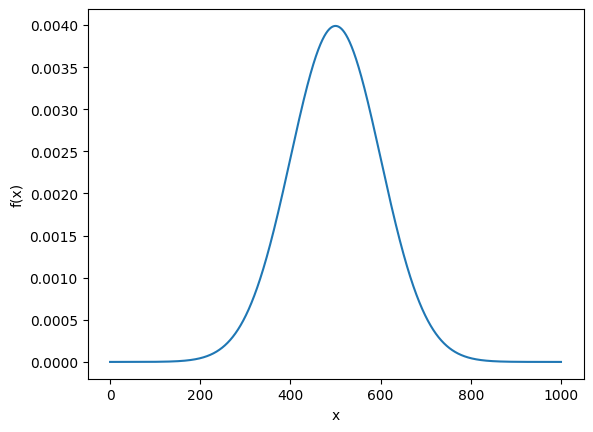

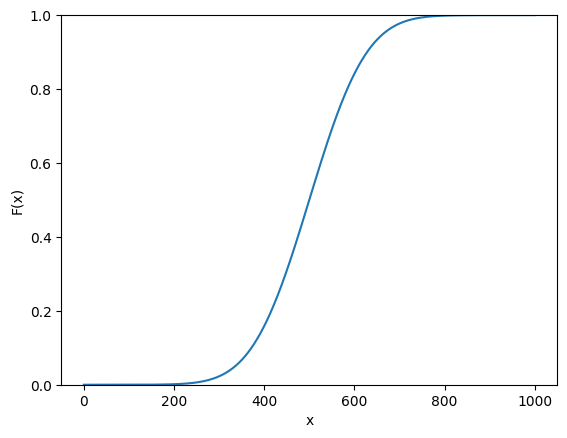

In [18]:
label = ("x", "f(x)")
show_plot(x,fx, label)
Label = ("x", "F(x)")
show_plot(x,Fx, Label,1)

## 対数正規分布
基本的には正規分布と同様に計算可能

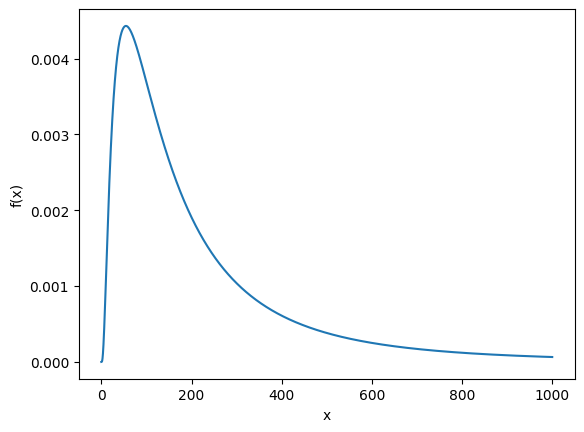

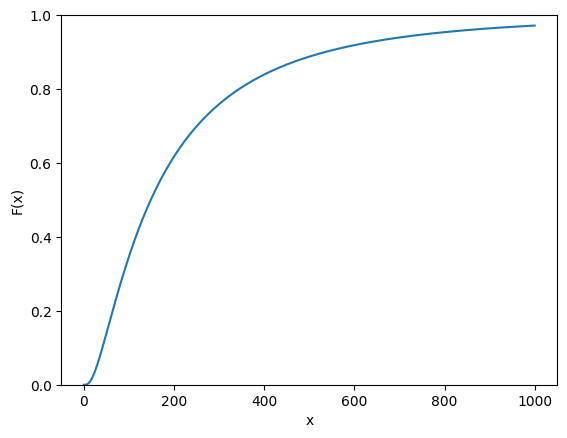

In [19]:
mu    = 5
sigma = 1
fx = 1/((2*np.pi)**0.5*sigma*x)*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
Fx = [np.sum(fx[:i]*dx) for i in range(len(fx))]
show_plot(x,fx, label); show_plot(x,Fx, Label,1)

## 2母数ワイブル分布
理論解が得られており，計算が高速(現在では正規分布も，近似関数を用いた高速関数は存在する。)  
形状表現の自由度は増加。

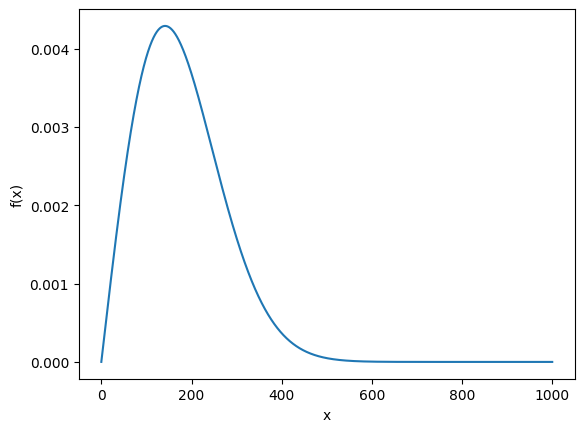

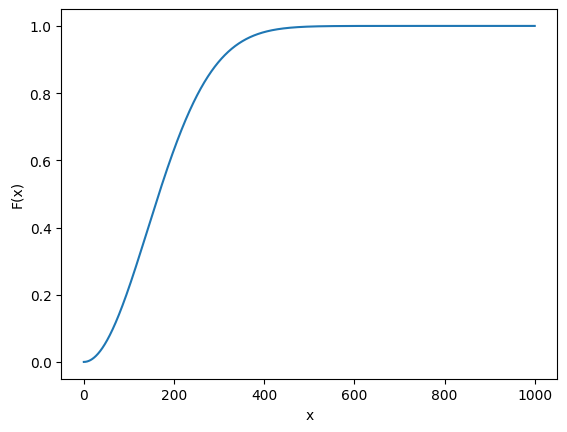

In [27]:
m   = 2   #形状母数
eta = 200 #尺度母数
fx = m/eta*(x/eta)**(m-1)*np.exp(-(x/eta)**m)
Fx = 1-np.exp(-(x/eta)**m)
show_plot(x,fx, label); show_plot(x,Fx, Label,0)

## 3母数ワイブル分布
Xに対して定数項を加えることで，最小値が表現可能（理屈としては単にオフセットなので，正規分布や対数正規分布でも再現可能）  
位置母数が0の場合は2母数ワイブル分布と同じ。

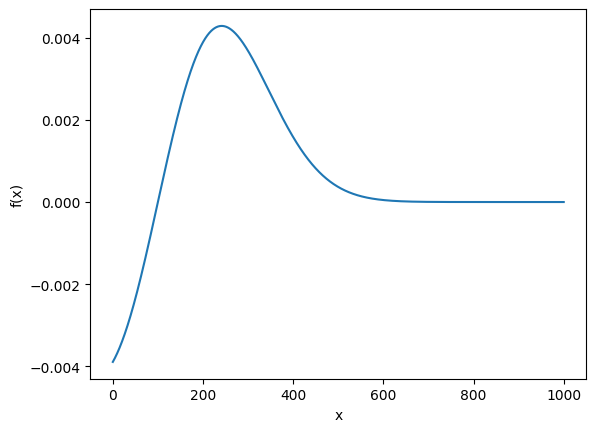

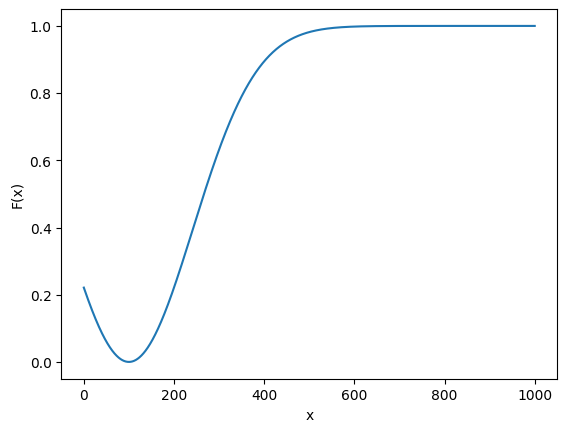

In [30]:
m     = 2   #形状母数
eta   = 200 #尺度母数
gamma = 100 #位置母数

fx = m/eta*((x-gamma)/eta)**(m-1)*np.exp(-((x-gamma)/eta)**m)
Fx = 1-np.exp(-((x-gamma)/eta)**m)
show_plot(x,fx, label); show_plot(x,Fx, Label,0)